<div style="text-align: right"> 
MSE TSM_MachLe Machine Learning <br> FS 2020 <br>
    <a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> 
</div>

# The Curse of Dimensionality



- MSE TSM_MachLE
- *Author: Prof. Dr. Christoph Würsch, Institute for Computational Engineering ICE, OST*
- based on a blog by Martin Thoma: [link](https://martin-thoma.com/curse-of-dimensionality/)

In machine learning, the "curse of dimensionality" is often stated but much less often explained. At least not in detail. One just gets told that points are farer away from each other in high dimensional spaces.

## 1. Maximum minimal distance ¶
One approach to this is to calculate the maximum minimal distance of 

One approach to this is to calculate the maximum minimal distance of $k$ points in $[0,1]$. So you try to place 
$k$ points in such a way, that the minimum over the pairwise distances of those $k$ points is maximal. Let's call this $\alpha(n,k)$. However, it is not easily possible to calculate $\alpha(n,k)$ for arbitrary $n>2$.

But the special case $k=2$ and $n=2$ it is easy:

- $\alpha(n,2)=\sqrt{n}$
- $\alpha(n,2^n)=1$

So you can see that two points get can be farer apart in higher dimensions and that it needs much more points in higher dimensions to force at least two of them to have distance $1$.

## 2. Average distance

Another approach is to calculate the average Euclidian distance of $k$ uniformly randomly sampled points in $[0,1]^n$. Let's call it 
$\beta(n,k)$.

One first insight is that $\beta(n,k)=\beta(n,j)$ for $k,j\ge2$. Hence, we will only use $\beta(n)$ in the following.
It is possible to calculate this, but it is rather tedious ([see link](https://math.stackexchange.com/questions/1254129/average-distance-between-two-random-points-in-a-square/1254154#1254154)).

Just two calculated solutions for $k=2$:

- $\beta(1) = \frac{1}{3}$
- $\beta(2) = \frac{2+\sqrt{2}+5\operatorname{arcsinh}(1)}{15}=\frac{2+\sqrt{2}+5\log(1+\sqrt{2})}{15} \approx 0.52140543316472\ldots$

We have to compute:
$$I=\int_{[0,1]^4}\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}\,d\mu. \tag{1}$$
Assuming that $X_1$ and $X_2$ are two independent random variables, uniformly distributed over [0,1], the pdf of their difference $\Delta X=X_1−X_2$ is given by:

$$I=\int_{[0,1]^4}\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}\,d\mu. \tag{1}$$

hence:
$$\begin{eqnarray*} I &=& \iint_{[-1,1]^2}(1-|x|)(1-|y|)\sqrt{x^2+y^2}\,dx\,dy \\&=&4\iint_{[0,1]^2}xy\sqrt{(1-x)^2+(1-y)^2}\,dx\,dy\tag{3}\end{eqnarray*}$$
that is tedious to compute but still possible; we have:

$$I = \frac{2+\sqrt{2}+5\operatorname{arcsinh}(1)}{15}=\frac{2+\sqrt{2}+5\log(1+\sqrt{2})}{15}=0.52140543316472\ldots$$

In general, this distance is very hard to compute, see [MathWorld](https://mathworld.wolfram.com/HypercubeLinePicking.html).

## 3. A simple upper bound for the average Euclidian distance

A simple argument via Jensen's inequality gives an upper bound; we first note that if $X=(X_1,…,X_n)$ is uniform on $[0,1]^n$ then each of the marginals $X_i \in [0,1]$ are independent and uniform. Then

\begin{aligned}
\beta(n)= \mathbb{E} \left[ |X - Y|\right] 
& = \mathbb{E} \left[ \left( \sum_{i=1}^n(X_i - Y_i)^2 \right)^{1/2} \right] \\ 
& \leq \mathbb{E} \left[ \sum_{i=1}^n(X_i - Y_i)^2 \right]^{1/2} 
 = \sqrt{n} \cdot \mathbb{E} [(X_1 - Y_1)^2]^{1/2}
 = \sqrt{\frac{n}6}
\end{aligned}

This is because the distance squared for $n=1$ is given by:
\begin{aligned}
\mathbb{E} [\Delta x^2] &= \int \int \left[ p(x)\cdot x - p(x')\cdot x' \right]^2 dx dx' \\
& =\int_0^1 \int_0^1 (x - x')^2 dx dx'\\
& =\int_0^1 \int_0^1 (x^2-2xx' + x'^2) dx dx' =\frac{1}{6}
\end{aligned}

Text(0, 0.5, 'average distance')

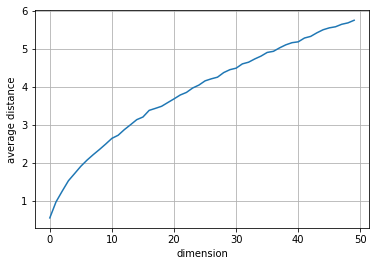

In [20]:
# seed the pseudorandom number generator
import numpy as np
from numpy.random import seed
from numpy.random import rand
import seaborn as sns
import matplotlib.pyplot as plt

N=100
seed(1)
beta=list()
DimList=np.linspace(2,200)


for d in DimList:
    # seed random number generator
    # generate some random numbers
    x=rand(np.int32(d),N)
    y=rand(np.int32(d),N)
    #print(np.shape(x))
    z=np.power(x-y,2)
    #print(np.shape(z))
    beta.append(np.mean(np.sqrt(np.sum(z,axis=0))))


plt.figure
plt.plot(beta)
plt.grid()
plt.xlabel('dimension')
plt.ylabel('average distance')
# reset the seed



## 4. Density of Hypercubes

One interesting question is how much of the $n$-dimensional hypercube can be filled by one inscribed $n$-dimensional hyperball. The volume of an $n$-dimensional hypercube is $V_C(a) = a^n$ where $a$ is the cubes side length. So for one dimension it is $a$, for 2 dimensions (a square) it is $a^2$ and for $n=3$ it is the volume of a cube.


The volume of an $n$-dimensional ball is given by:

$$V_S(r) = r^n \cdot \frac{\pi^{n/2}}{\Gamma (\frac{n}{2} + 1)}$$

\begin{aligned}
n=1: \quad & r \cdot \frac{\sqrt{\pi}}{\Gamma(1.5)} = r \frac{\sqrt{\pi}}{0.5 \Gamma(0.5)} = 2r \\
n=2: \quad & r^2 \cdot \frac{\pi}{\Gamma (2)} = r^2 \frac{\pi}{\Gamma (1)} = r^2 \pi \\
n=3: \quad & r^3 \cdot \frac{\pi^{3/2}}{\Gamma (\frac{5}{2})} = r^3 \frac{\pi^{3/2}}{1.5 \cdot 0.5 \cdot \Gamma (\frac{1}{2})} = r^3 \frac{\pi}{\frac{3}{4}}
\end{aligned}


This means the __percentage of space of a unit hypercube which can be filled by the biggest inscribed hyperball__ is:

\begin{align}
\frac{V_S(0.5)}{V_C(1)}
&= \frac{r^n \frac{\pi^{n/2}}{\Gamma (\frac{n}{2} + 1)}}{1} 
= \frac{0.5^n \pi^{n/2}}{\Gamma (\frac{n}{2} + 1)} \\
&= \frac{0.5^n \pi^{n/2}}{\frac{n}{2} \cdot \Gamma (\frac{n}{2})} 
= \frac{0.5^n \cdot 2 \cdot \pi^{n/2}}{n \cdot \frac{2 \frac{n}{2}!}{n}} \\
&= \frac{0.5^n \cdot \pi^{n/2}}{\frac{n}{2}!}
\end{align}

__You can see that this term goes to zero with increasing dimension. This means most of the volume is not in the center, but in the edges of the $n$ dimensional hypercube. It also means that $k$ nearest neighbors with Euclidean Distance measure will need enormously large spheres to get to the next neighbours__.


## 5. Average Angle

One interesting question is how the average angle between two points (and the origin) changes with higher dimensions. Suppose all points are in the $[0,1]^n$ hypercube.

I thought about this for a while and came to the conclusion that it should be 90° in average due to symmetry. No matter how high the dimension is, because the higer the dimension $n$ becomes, the closer the data is concentrated to the axes.

A short experiment confirms that:

    1 dim: 90.0000 avg angle


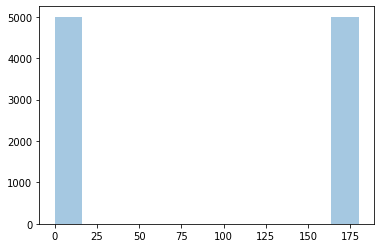

    2 dim: 88.1192 avg angle


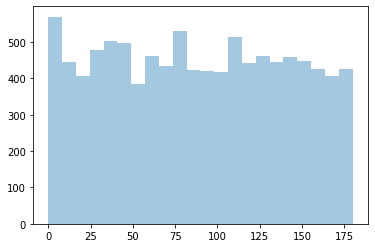

    3 dim: 88.9689 avg angle


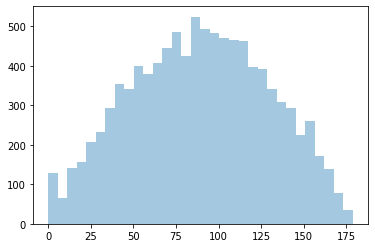

    4 dim: 88.5391 avg angle


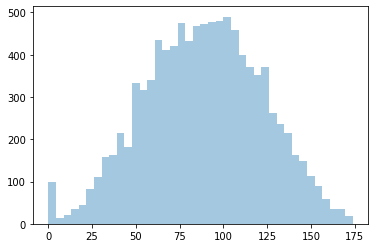

    5 dim: 88.7889 avg angle


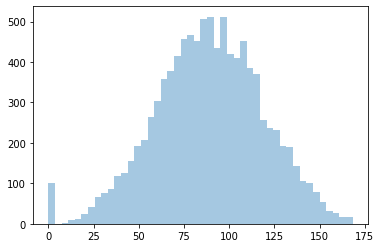

    6 dim: 89.3063 avg angle


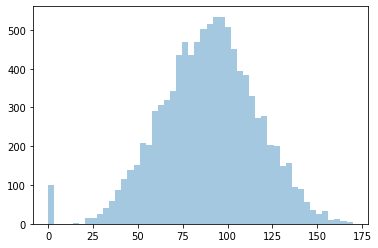

    7 dim: 89.2500 avg angle


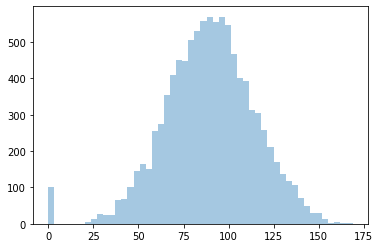

    8 dim: 89.3102 avg angle


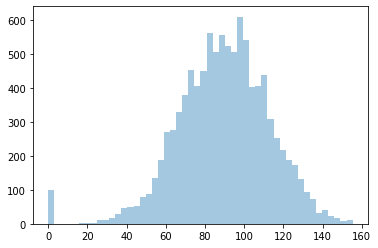

    9 dim: 89.1824 avg angle


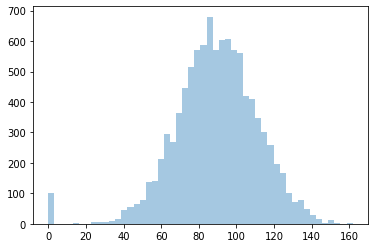

   10 dim: 89.3358 avg angle


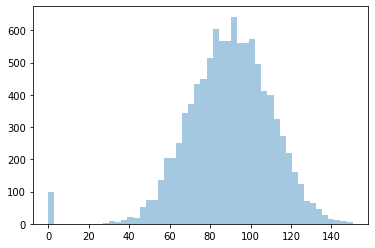

  100 dim: 89.1531 avg angle


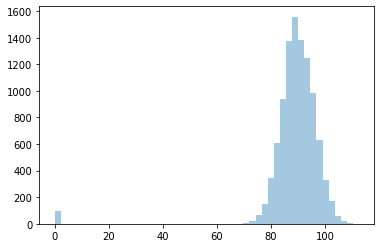

 1000 dim: 89.1088 avg angle


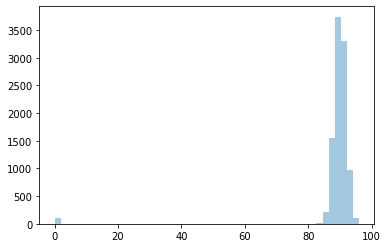

10000 dim: 89.0964 avg angle


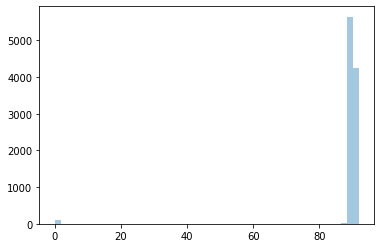

In [21]:

from scipy import spatial
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def cosine_dist(p1, p2):
    """
    Calculate the cosine distance between to points in R^n.

    Examples
    --------
    >>> cosine_dist([1, 0], [0, 1])
    90.0
    >>> cosine_dist([1, 0], [2, 0])
    0.0
    >>> cosine_dist([1, 0], [-1, 0])
    180.0
    """
    ang = 1 - spatial.distance.cosine(p1, p2)
    if not (-1 <= ang <= 1):
        if ang >= 1:
            return 0
        if ang <= -1:
            return 180
    return np.degrees(np.arccos(ang))


def get_angles(n, num_points=100):
    """Get angles of random points in n-dimensional unit hypercube."""
    points = 2 * np.random.rand(num_points, n) - 1
    angles = []
    for p1 in points:
        for p2 in points:
            angles.append(cosine_dist(p1, p2))
    return angles


if __name__ == "__main__":
    import doctest

    doctest.testmod()
    for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000, 10000]:
        angles = get_angles(n)
        print("{:>5} dim: {:0.4f} avg angle".format(n, sum(angles) / len(angles)))
        sns.distplot(angles, kde=False, rug=False)
        plt.show()